In [1]:
from IPython.core.display import HTML
with open('style.css') as file:
    css = file.read()
HTML(css)

# The Fibonacci Numbers

The <em style="color:blue;">Fibonacci Numbers</em> $F_n$ are defined by induction for all $n\in\mathbb{N}$:
  - $F_0 := 0$,
  - $F_1 := 1$, 
  - $F_{n+2} = F_{n+1} + F_n$.

The function $\texttt{fib}(n)$ computes the number $F_n$.

In [2]:
def fib(n):
    if n <= 1:
        return n
    return fib(n-1) + fib(n-2)

In [3]:
[fib(n) for n in range(19)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]

In [4]:
import time
import numpy             as np
import matplotlib.pyplot as plt

In [5]:
m = 36
Y = []
for n in range(m):
    start = time.time()
    print(f'fib({n}) = {fib(n)}')
    stop  = time.time()
    print(stop - start)
    Y.append(stop - start)
Y = np.array(Y)

fib(0) = 0
0.00032401084899902344
fib(1) = 1
2.3126602172851562e-05
fib(2) = 1
1.0013580322265625e-05
fib(3) = 2
1.0013580322265625e-05
fib(4) = 3
9.775161743164062e-06
fib(5) = 5
1.0013580322265625e-05
fib(6) = 8
1.1205673217773438e-05
fib(7) = 13
2.6226043701171875e-05
fib(8) = 21
4.124641418457031e-05
fib(9) = 34
4.38690185546875e-05
fib(10) = 55
6.604194641113281e-05
fib(11) = 89
7.200241088867188e-05
fib(12) = 144
8.487701416015625e-05
fib(13) = 233
0.00018310546875
fib(14) = 377
0.00013184547424316406
fib(15) = 610
0.00019502639770507812
fib(16) = 987
0.0004100799560546875
fib(17) = 1597
0.0005178451538085938
fib(18) = 2584
0.0009729862213134766
fib(19) = 4181
0.001474142074584961
fib(20) = 6765
0.0022783279418945312
fib(21) = 10946
0.0036859512329101562
fib(22) = 17711
0.005551815032958984
fib(23) = 28657
0.01030588150024414
fib(24) = 46368
0.019374847412109375
fib(25) = 75025
0.023077011108398438
fib(26) = 121393
0.036351919174194336
fib(27) = 196418
0.05873513221740723
fib(28)

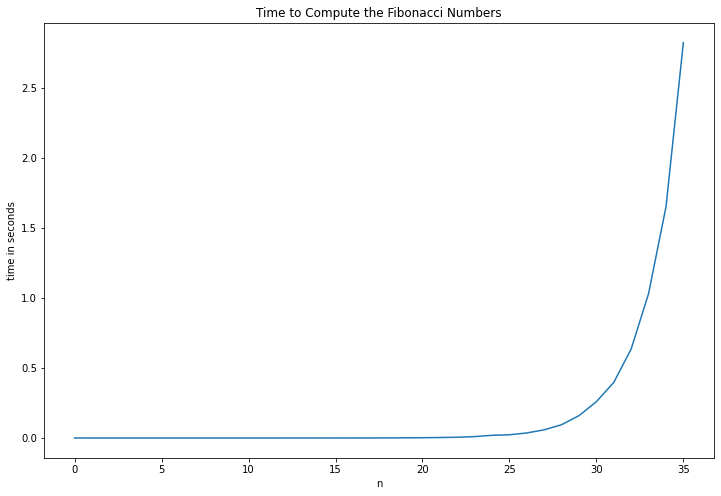

In [6]:
X = np.array(range(m))
plt.figure(figsize=(12, 8))
plt.plot(X, Y) 
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Time to Compute the Fibonacci Numbers')
plt.show()

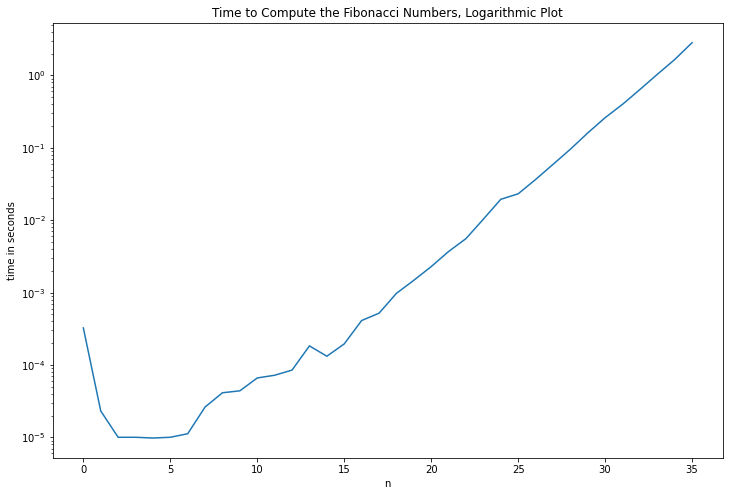

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X, Y) 
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Time to Compute the Fibonacci Numbers, Logarithmic Plot')
plt.show()

If we want to compute the Fibonacci numbers efficiently, we must not compute the value`fib(n)` for a given `n` twice.  The easiest way to achieve this is by storing the Fibnacci numbers in a list `L`.  In the implementation below, `L[n]` stores the $n$-th Fibonacci number.

In [8]:
def fibMem(n):
    if n <= 1:
        return n
    L    = [0 for k in range(n+1)]
    L[0] = 0
    L[1] = 1
    for k in range(2, n+1):
        L[k] = L[k-1] + L[k-2]
    return L[n]

In [9]:
%%time
x = fibMem(10000)

CPU times: user 4.75 ms, sys: 1.23 ms, total: 5.98 ms
Wall time: 5.61 ms


In [10]:
x

3364476487643178326662161200510754331030214846068006390656476997468008144216666236815559551363373402558206533268083615937373479048386526826304089246305643188735454436955982749160660209988418393386465273130008883026923567361313511757929743785441375213052050434770160226475831890652789085515436615958298727968298751063120057542878345321551510387081829896979161312785626503319548714021428753269818796204693609787990035096230229102636813149319527563022783762844154036058440257211433496118002309120828704608892396232883546150577658327125254609359112820392528539343462090424524892940390170623388899108584106518317336043747073790855263176432573399371287193758774689747992630583706574283016163740896917842637862421283525811282051637029808933209990570792006436742620238978311147005407499845925036063356093388383192338678305613643535189213327973290813373264265263398976392272340788292817795358057099369104917547080893184105614632233821746563732124822638309210329770164805472624384237486241145309381220656491403

In [11]:
def memoize(f):
    cache = {}
    def memoizedF(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return memoizedF

In [12]:
fib = memoize(fib)

In [13]:
fib(1000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [14]:
fib(10000)

RecursionError: maximum recursion depth exceeded

In [15]:
import sys

In [16]:
sys.setrecursionlimit(20000)

In [17]:
%%time
fib(10000)

CPU times: user 11 ms, sys: 3.86 ms, total: 14.9 ms
Wall time: 14.3 ms


3364476487643178326662161200510754331030214846068006390656476997468008144216666236815559551363373402558206533268083615937373479048386526826304089246305643188735454436955982749160660209988418393386465273130008883026923567361313511757929743785441375213052050434770160226475831890652789085515436615958298727968298751063120057542878345321551510387081829896979161312785626503319548714021428753269818796204693609787990035096230229102636813149319527563022783762844154036058440257211433496118002309120828704608892396232883546150577658327125254609359112820392528539343462090424524892940390170623388899108584106518317336043747073790855263176432573399371287193758774689747992630583706574283016163740896917842637862421283525811282051637029808933209990570792006436742620238978311147005407499845925036063356093388383192338678305613643535189213327973290813373264265263398976392272340788292817795358057099369104917547080893184105614632233821746563732124822638309210329770164805472624384237486241145309381220656491403